In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings

In [36]:
warnings.filterwarnings("ignore")

In [37]:
data = pd.read_csv('employee.csv')

In [38]:
data.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [39]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met_more_than_80', 'awards_won',
       'avg_training_score'],
      dtype='object')

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10  KPIs_met_more_than_80  17417 non-null  int64  
 11  awards_won             17417 non-null  int64  
 12  avg_training_score     17417 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 1.7+ MB


In [41]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
count,17417.000000,17417.000000,17417.000000,16054.000000,17417.000000,17417.000000,17417.000000,17417.000000
mean,39083.491129,1.250732,34.807774,3.345459,5.801860,0.358845,0.023368,63.176322
std,22707.024087,0.595692,7.694046,1.265386,4.175533,0.479675,0.151074,13.418179
min,3.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000
25%,19281.000000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000
50%,39122.000000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000
75%,58838.000000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,75.000000
max,78295.000000,9.000000,60.000000,5.000000,34.000000,1.000000,1.000000,99.000000


In [42]:
data.isnull()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17412,False,False,False,False,False,False,False,False,False,False,False,False,False
17413,False,False,False,False,False,False,False,False,False,False,False,False,False
17414,False,False,False,False,False,False,False,False,False,False,False,False,False
17415,False,False,False,False,False,False,False,False,False,False,False,False,False


In [43]:
print('Train Dataset Missing Values:')
print(data.isnull().sum())

Train Dataset Missing Values:
employee_id                 0
department                  0
region                      0
education                 771
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     1363
length_of_service           0
KPIs_met_more_than_80       0
awards_won                  0
avg_training_score          0
dtype: int64


In [44]:
data['education'].fillna('Unknown', inplace=True)

In [45]:
data = data.drop(['previous_year_rating'], axis=1)

<Figure size 1000x1000 with 0 Axes>

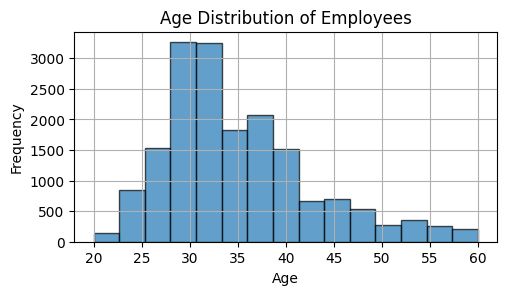

In [55]:
plt.figure(figsize=(10,10))
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.hist(data['age'], bins=15, edgecolor='black', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Employees')
plt.grid(True)

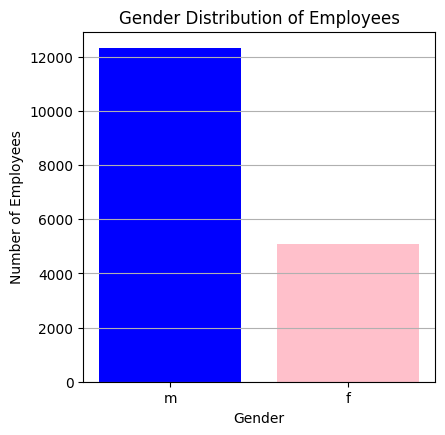

In [53]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 2)
gender_counts = data['gender'].value_counts()
plt.bar(gender_counts.index, gender_counts, color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Number of Employees')
plt.title('Gender Distribution of Employees')
plt.grid(axis='y')

Text(0.5, 1.0, 'Percentage of Each Gender')

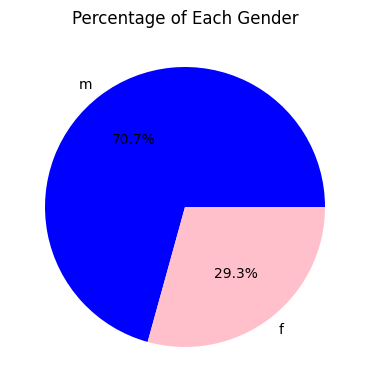

In [52]:
custom_colors = ['skyblue', 'lightcoral']
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 3)
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['blue', 'pink'])
plt.title('Percentage of Each Gender')

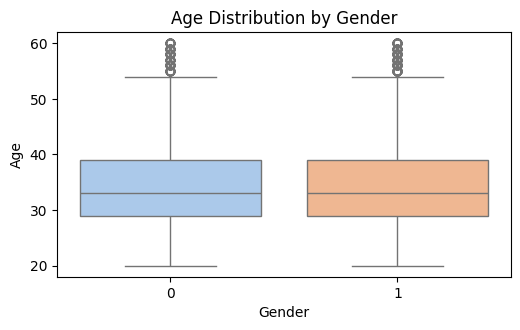

In [49]:
le = LabelEncoder()
data['Gender_encoded'] = le.fit_transform(data['gender'])
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 4)
sns.boxplot(x='Gender_encoded', y='age', data=data, palette='pastel')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Age Distribution by Gender')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Age vs. Avg Training Score')

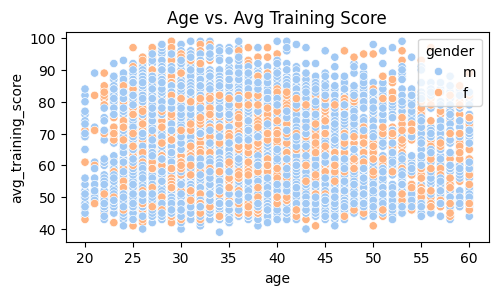

In [58]:
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.scatterplot(x='age', y='avg_training_score', data=data, hue='gender', palette='pastel')
plt.title('Age vs. Avg Training Score')

Text(0.5, 1.02, 'Pair Plot for Numeric Variables')

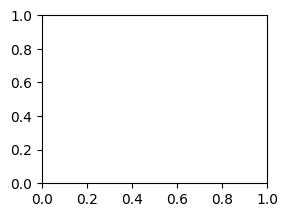

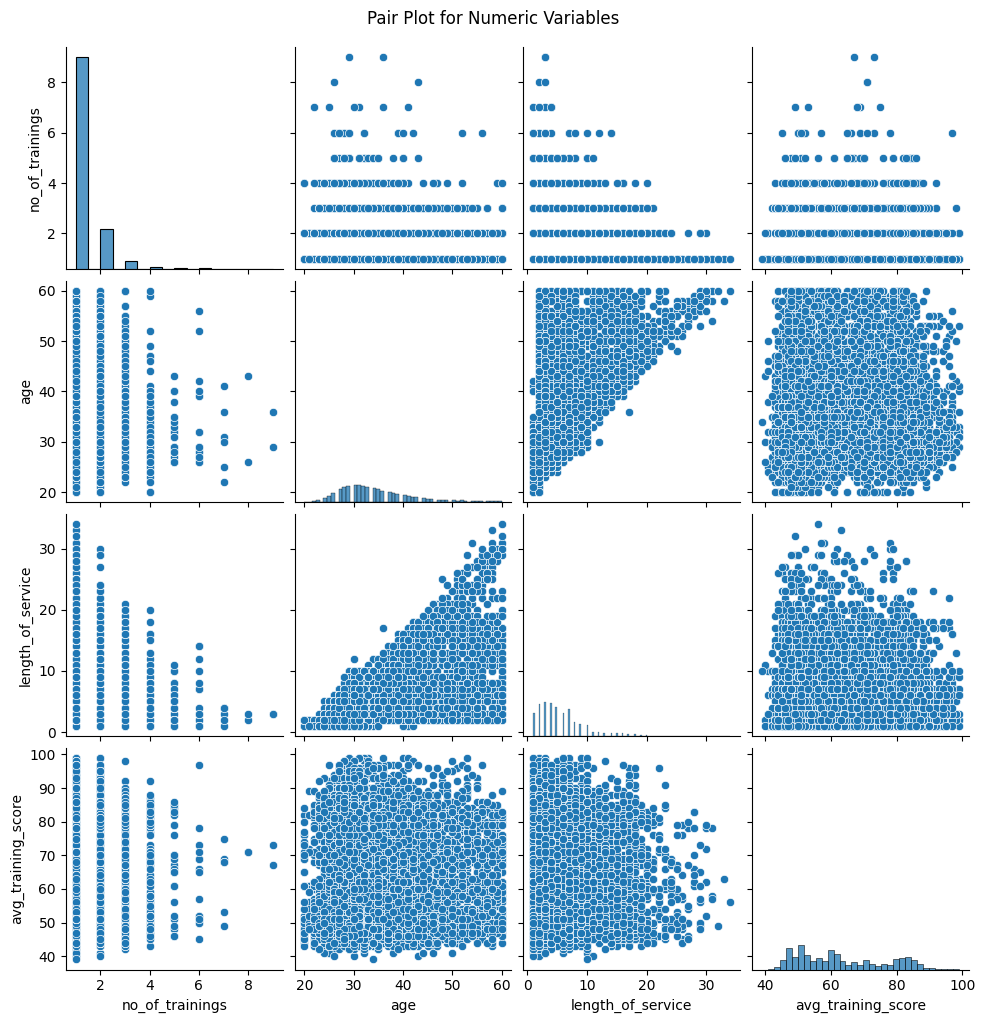

In [59]:
plt.subplot(2, 2, 2)
numeric_cols = ['no_of_trainings', 'age', 'length_of_service', 'avg_training_score']
sns.pairplot(data[numeric_cols])
plt.suptitle('Pair Plot for Numeric Variables', y=1.02)

Text(0.5, 1.0, 'Department vs. Avg Training Score')

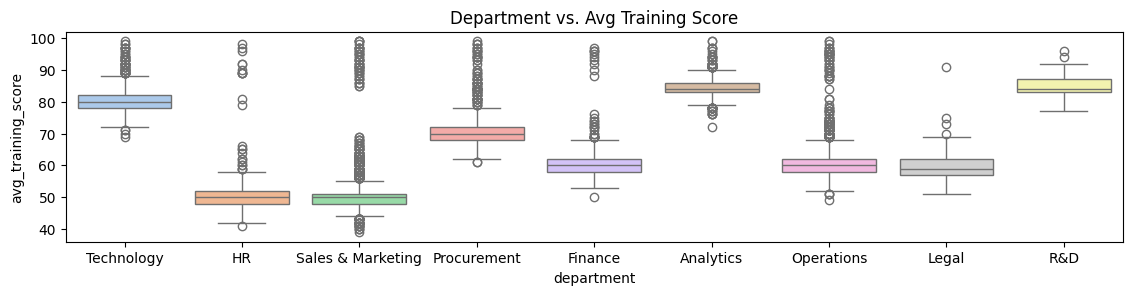

In [65]:
plt.figure(figsize=(30, 6))
plt.subplot(2, 2, 3)
sns.boxplot(x='department', y='avg_training_score', data=data, palette='pastel')
plt.title('Department vs. Avg Training Score')

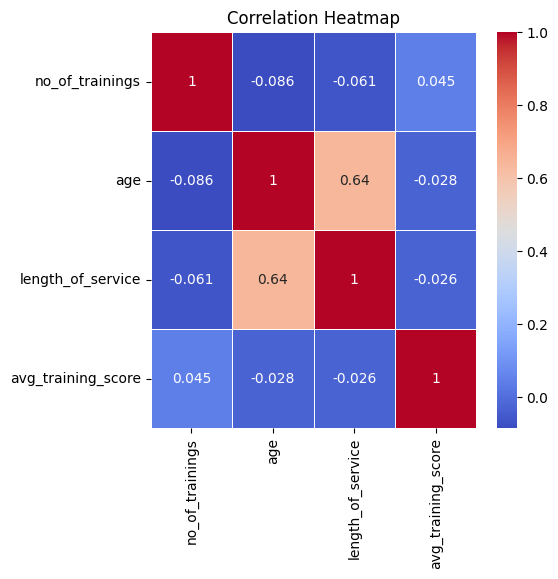

In [73]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 2)
correlation_matrix = data[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()